Import Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as pe
import matplotlib.dates as mdates


In [50]:
import os
print(os.getcwdb())

b'd:\\week-1\\Financial-News-and-Stock-Price-Integration-Analysis-Week-1\\notebooks'


Exploratory Data Analysis (EDA)
Load and Display News Dataset

In [79]:
news_data = pd.read_csv('../Data/raw_analyst_ratings.csv')
news_data = pd.DataFrame(news_data)
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Size of Data

In [80]:
news_data.shape

(1407328, 6)

Summary Statistics:
Overview of the dataset

In [81]:
print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


Missing values

In [82]:
missing_values = news_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


Descriptive Statistics Of News Dataset
Headline length of news data

In [83]:
headline_lengths = news_data['headline'].apply(len)
headline_lengths.head(10)

0     39
1     42
2     29
3     44
4     87
5     71
6     73
7    120
8     84
9     42
Name: headline, dtype: int64

Count Maximum Maximum of News data headline

In [84]:
np.round(headline_lengths.describe(),2) 

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline, dtype: float64

Number of published articles in specific date

In [85]:
publisher_date_counts = news_data['date'].value_counts()
publisher_date_counts.head(10)

date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
Name: count, dtype: int64

Time Series Analysis

In [86]:
print(news_data['date'].head())
print(news_data['date'].isnull().sum())  # Check for missing values


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
0


In [87]:
news_data['date'].dt.to_period('Y').value_counts().sort_index().plot(kind="line", figsize=(20,6), title='Number of Published Articles by Year', xlabel='Year', ylabel='Number of Published Articles')


AttributeError: Can only use .dt accessor with datetimelike values

In [61]:
news_data['date'] = pd.to_datetime(news_data['date'], utc=True)

# news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

news_data['date'].dt.to_period('Y').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# There seem to be specific peak periods where the number of published articles significantly increases. Identifying these periods can provide insights into factors driving the surge in publications.


ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Calculate sentiment analysis on news headline using TexBlob 

In [88]:
import sys
import os
import sys
sys.path.append(os.path.abspath("../scripts"))
from financialAnalysis import get_sentiment

news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)


Display Calculated Sentiment

In [89]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


Gauge the sentiment (positive, negative, neutral) associated with the news.


In [90]:
news_data['sentiment_score_word'] = news_data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [91]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score,sentiment_score_word
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0,neutral


Sentiment score with respect to date

<Axes: xlabel='date'>

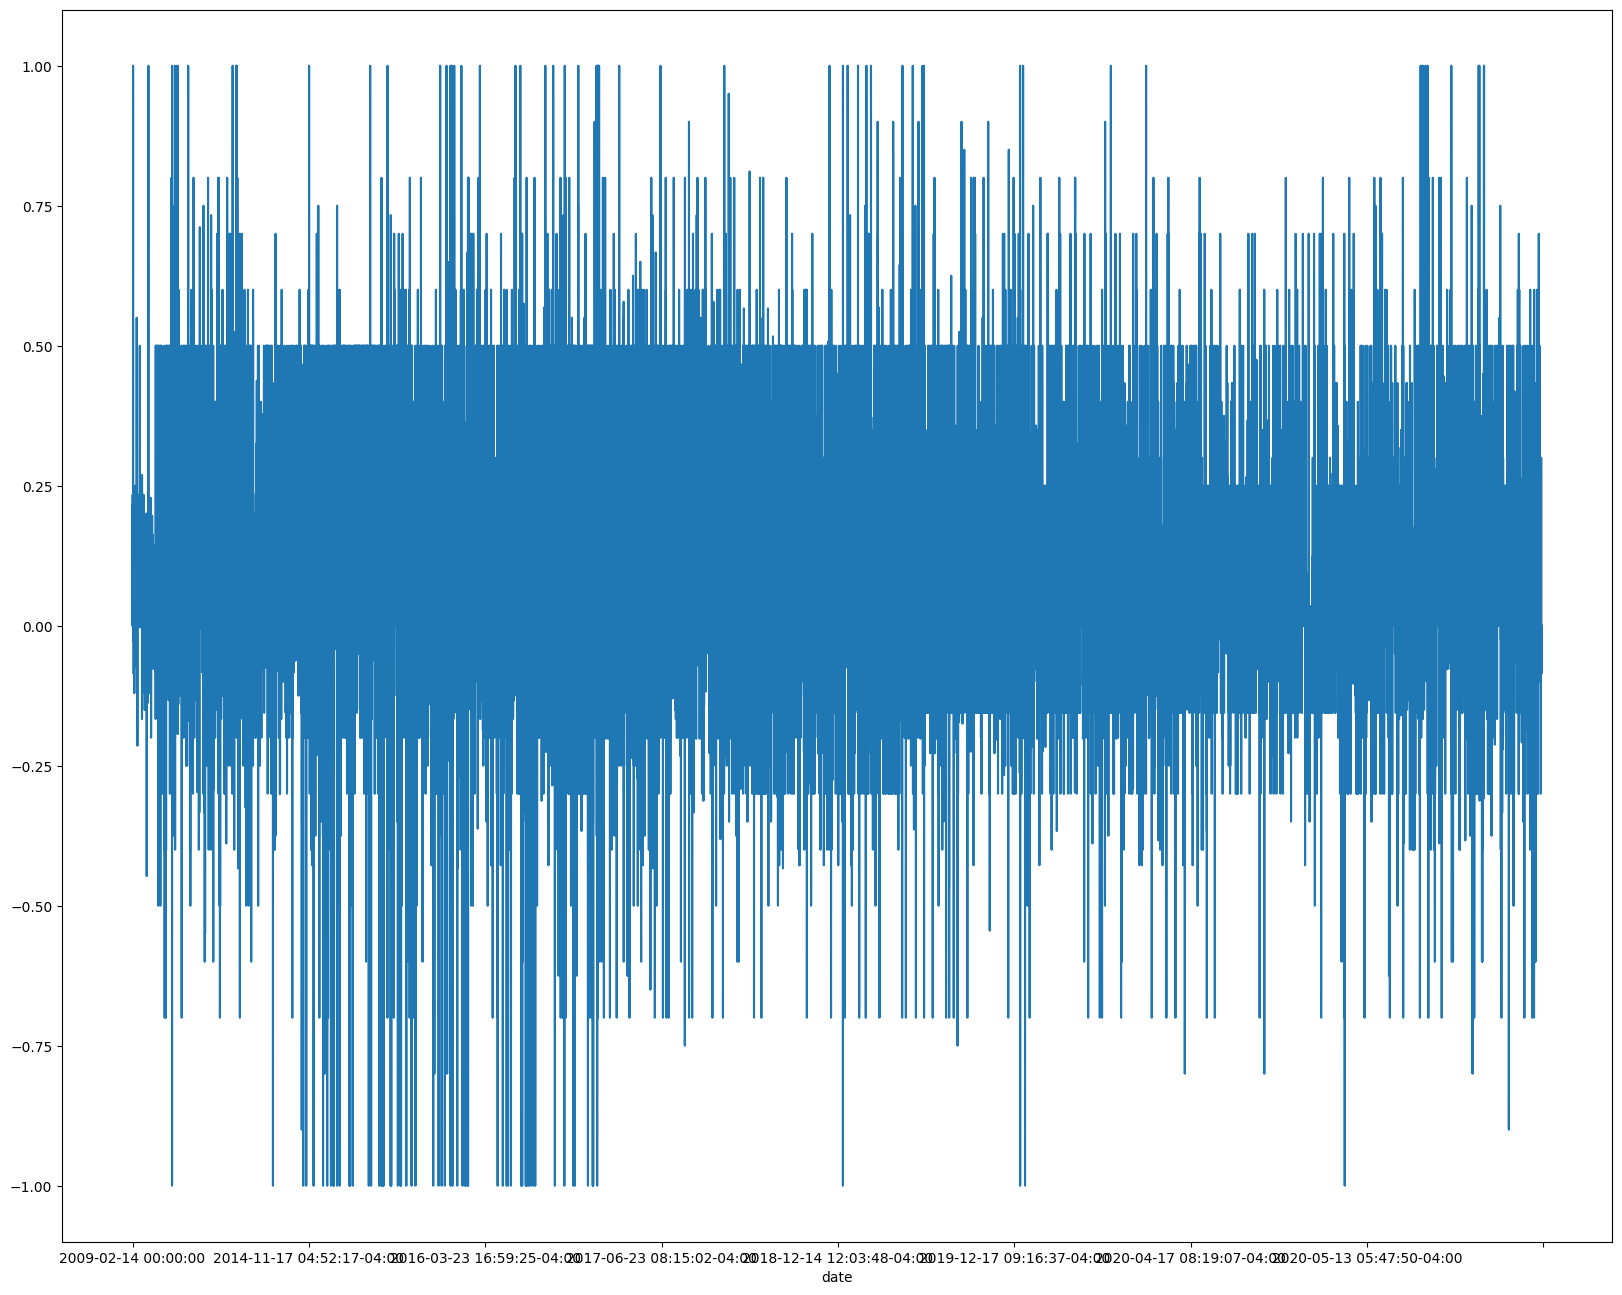

In [92]:
news_data.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16))

Sentiment categories by numbers

In [93]:
numberOfSentimentCategories=news_data['sentiment_score_word'].value_counts()
print(numberOfSentimentCategories)

sentiment_score_word
neutral     934914
positive    341178
negative    131236
Name: count, dtype: int64


Sentiment categories by bar chart

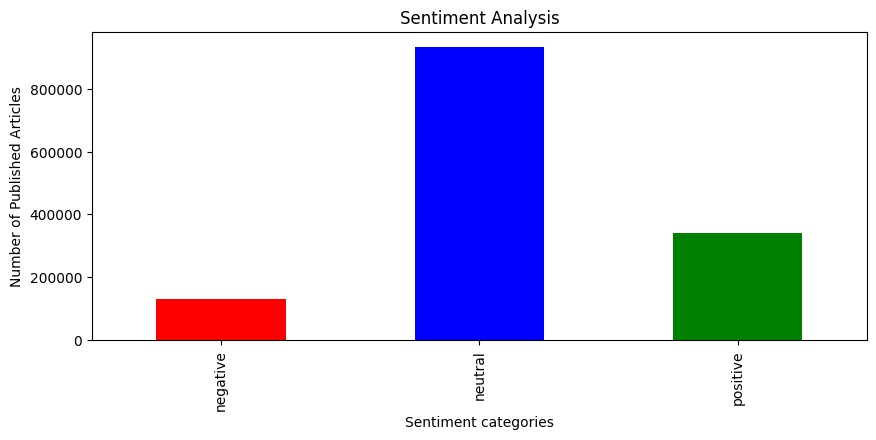

In [98]:
from sentiment import numberOfArticlesWithSentimentAnalysis
numberOfArticlesWithSentimentAnalysis(news_data)

Sentiment categories by percentage

In [99]:
numberOfSentiment=news_data['sentiment_score_word'].shape
persentOfCategories = np.round((numberOfSentimentCategories/numberOfSentiment)*100,1)
persentOfCategories.head()

sentiment_score_word
neutral     66.4
positive    24.2
negative     9.3
Name: count, dtype: float64

Topic Modeling